<a href="https://colab.research.google.com/github/bharaththolikonda/DS/blob/main/Multi_Linear_Regression_for_50_startups.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Prepare a prediction model for profit of 50_startups data.**

## **Do transformations for getting better predictions of profit and make a table containing R^2 value for each prepared model.**

In [1]:
import pandas as pd
import numpy as np
from google.colab import files
upload=files.upload()


Saving 50_Startups.csv to 50_Startups.csv


In [2]:
df=pd.read_csv("50_Startups.csv",encoding='latin1')
df

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [3]:
list(df)

['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit']

In [4]:
df.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [5]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

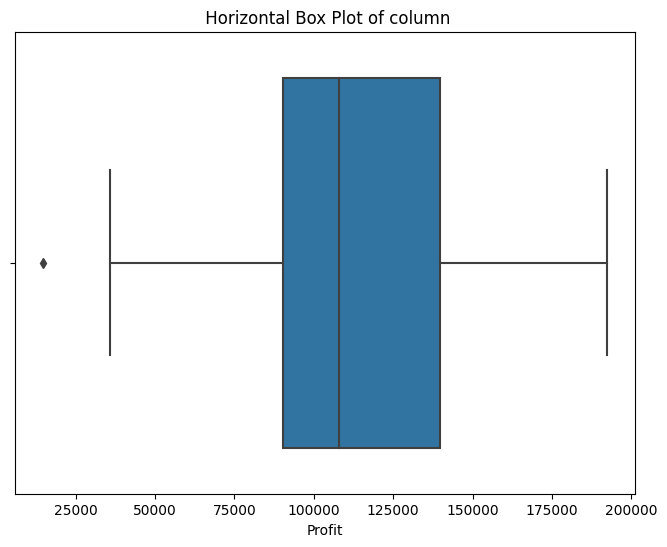

In [6]:
# EDA #
#EDA----->EXPLORATORY DATA ANALYSIS
#BOXPLOT AND OUTLIERS CALCULATION #
import seaborn as sns
import matplotlib.pyplot as plt
data = ['R_D_Spend','Administration','Marketing_Spend','Profit']
for column in data:
  plt.figure(figsize=(8, 6))     # Adjust the figure size as needed
sns.boxplot(x=df[column])
plt.title(" Horizontal Box Plot of column")
plt.show()


In [7]:
"""removing the ouliers"""
# List of column names with continuous variables
continuous_columns = ['R_D_Spend','Administration','Marketing_Spend','Profit']
# Create a new DataFrame without outliers for each continuous column
data_without_outliers = df.copy()
for df.cloumns in continuous_columns:
    Q1 = data_without_outliers[column].quantile(0.25)
    Q3 = data_without_outliers[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_whisker_Length = Q1 - 1.5 * IQR
    upper_whisker_Length = Q3 + 1.5 * IQR


In [8]:
data_without_outliers = data_without_outliers[(data_without_outliers[column] >= lower_whisker_Length) & (data_without_outliers[column]<= upper_whisker_Length)]
# Print the cleaned data without outliers
print(data_without_outliers)
df = data_without_outliers
print(df)
df.shape
df.info()

    R&D Spend  Administration  Marketing Spend       State     Profit
0   165349.20       136897.80        471784.10    New York  192261.83
1   162597.70       151377.59        443898.53  California  191792.06
2   153441.51       101145.55        407934.54     Florida  191050.39
3   144372.41       118671.85        383199.62    New York  182901.99
4   142107.34        91391.77        366168.42     Florida  166187.94
5   131876.90        99814.71        362861.36    New York  156991.12
6   134615.46       147198.87        127716.82  California  156122.51
7   130298.13       145530.06        323876.68     Florida  155752.60
8   120542.52       148718.95        311613.29    New York  152211.77
9   123334.88       108679.17        304981.62  California  149759.96
10  101913.08       110594.11        229160.95     Florida  146121.95
11  100671.96        91790.61        249744.55  California  144259.40
12   93863.75       127320.38        249839.44     Florida  141585.52
13   91992.39       

array([[<Axes: title={'center': 'R&D Spend'}>,
        <Axes: title={'center': 'Administration'}>],
       [<Axes: title={'center': 'Marketing Spend'}>,
        <Axes: title={'center': 'Profit'}>]], dtype=object)

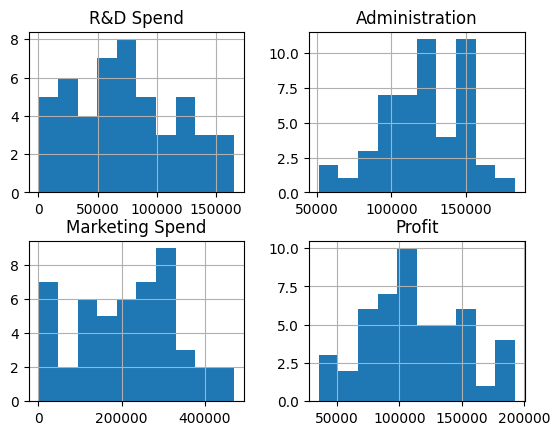

In [9]:

df.hist()

In [10]:
df.skew()


<ipython-input-10-9e0b1e29546f>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew()


R&D Spend          0.166914
Administration    -0.494544
Marketing Spend   -0.080504
Profit             0.225195
dtype: float64

In [11]:
df.kurt()

<ipython-input-11-8bd0d54cd88d>:1: FutureWarning: The default value of numeric_only in DataFrame.kurt is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.kurt()


R&D Spend         -0.730525
Administration     0.169731
Marketing Spend   -0.598297
Profit            -0.283295
dtype: float64

In [12]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,49.000000,49.000000,49.000000,49.000000
mean,75226.138367,121433.636327,214409.833265,113998.991020
std,45115.141560,28301.008988,121168.170072,38171.246893
min,0.000000,51283.140000,0.000000,35673.410000
25%,44069.950000,103057.490000,134050.070000,90708.190000
50%,73994.560000,122782.750000,214634.810000,108552.040000
75%,101913.080000,145077.580000,299737.290000,141585.520000
max,165349.200000,182645.560000,471784.100000,192261.830000


In [13]:
"""Standardising the data"""
# R_D_Spend,Administration,Marketing_Spend continuos variables as independent variables#

X1 = df.iloc[:,0:3]
X1
list(X1)

# transforming using standard scaler as they are continuos variables#
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
SS_X1 = SS.fit_transform(X1)
SS_X1

array([[ 2.01832469e+00,  5.52079905e-01,  2.14611996e+00],
       [ 1.95670428e+00,  1.06901708e+00,  1.91359564e+00],
       [ 1.75164950e+00, -7.24296833e-01,  1.61370926e+00],
       [ 1.54854512e+00, -9.85974260e-02,  1.40745668e+00],
       [ 1.49781841e+00, -1.07251262e+00,  1.26544171e+00],
       [ 1.26870558e+00, -7.71808618e-01,  1.23786573e+00],
       [ 1.33003620e+00,  9.19834274e-01, -7.22891254e-01],
       [ 1.23334870e+00,  8.60256757e-01,  9.12791275e-01],
       [ 1.01486978e+00,  9.74102040e-01,  8.10532777e-01],
       [ 1.07740527e+00, -4.55342087e-01,  7.55234477e-01],
       [ 5.97659604e-01, -3.86977582e-01,  1.23002453e-01],
       [ 5.69864464e-01, -1.05827379e+00,  2.94639173e-01],
       [ 4.17393186e-01,  2.10160275e-01,  2.95430415e-01],
       [ 3.75483690e-01,  5.02001604e-01,  3.18990814e-01],
       [ 1.00144878e+00,  1.25358311e+00,  3.51077348e-01],
       [ 8.80075044e-01,  4.22410798e-02,  3.94965553e-01],
       [ 6.24148089e-02,  5.85181631e-03

In [14]:
# converting into dataframe #

X2 = pd.DataFrame(SS_X1)
X2.columns = list(X1)
X2

,R&D Spend,Administration,Marketing Spend
0,2.018325,0.552080,2.146120
1,1.956704,1.069017,1.913596
2,1.751650,-0.724297,1.613709
3,1.548545,-0.098597,1.407457
4,1.497818,-1.072513,1.265442
5,1.268706,-0.771809,1.237866
6,1.330036,0.919834,-0.722891
7,1.233349,0.860257,0.912791
8,1.014870,0.974102,0.810533
9,1.077405,-0.455342,0.755234


In [15]:
"""  PROFIT COLUMN as this target variable """

X3 = df.iloc[:,4:5]
X3
SS_X2 = SS.fit_transform(X3)
SS_X2
X4 = pd.DataFrame(SS_X2)
X4.columns = list(X3)
X4

,Profit
0,2.071556
1,2.059122
2,2.039490
3,1.823808
4,1.381401
5,1.137968
6,1.114977
7,1.105185
8,1.011462
9,0.946565


In [16]:
"""   STATE COLUMN as this is categorical column we are performing the label encoding process """


X5 = df.iloc[:,3:4]
X5
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
LE1 = LE.fit_transform(X5)
LE1
X6 = pd.DataFrame(LE1)
X6.columns = list(X5)
X6.columns
X6

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,State
0,2
1,0
2,1
3,2
4,1
5,2
6,0
7,1
8,2
9,0


In [17]:
""" X7 variable contains all the independent variables data after standardising the data """

X7 = pd.concat([X2,X6],axis = 1)
X7
#ALL THE DATA IN ON ONE FRAME#

,R&D Spend,Administration,Marketing Spend,State
0,2.018325,0.552080,2.146120,2
1,1.956704,1.069017,1.913596,0
2,1.751650,-0.724297,1.613709,1
3,1.548545,-0.098597,1.407457,2
4,1.497818,-1.072513,1.265442,1
5,1.268706,-0.771809,1.237866,2
6,1.330036,0.919834,-0.722891,0
7,1.233349,0.860257,0.912791,1
8,1.014870,0.974102,0.810533,2
9,1.077405,-0.455342,0.755234,0


In [18]:
""" FINDING THE CORRELATION X8 = pd.concat([X7,X4],axis = 1)
X8 BETWEEN ALL THE X VARIABLES AND TARGET VARIABLE (PROFIT)"""

X8 = pd.concat([X7,X4],axis = 1)
X8.corr()


,R&D Spend,Administration,Marketing Spend,State,Profit
R&D Spend,1.000000,0.243438,0.711654,0.067359,0.978437
Administration,0.243438,1.000000,-0.037280,0.008080,0.205841
Marketing Spend,0.711654,-0.037280,1.000000,0.045313,0.739307
State,0.067359,0.008080,0.045313,1.000000,0.044876
Profit,0.978437,0.205841,0.739307,0.044876,1.000000


In [19]:
# we have a larger relation with R&D Spend  with profit target variable so we will first fit that x variable
# fit the linear regression model#

""" Defining X and Y variables """
X = pd.concat([X2,X6],axis = 1)
X

Y = X4
Y


,Profit
0,2.071556
1,2.059122
2,2.039490
3,1.823808
4,1.381401
5,1.137968
6,1.114977
7,1.105185
8,1.011462
9,0.946565


In [20]:
"""  FITTING THE MODEL"""       # case 1
""" here X7 and X4 are the data frames where our transformed data is stored """

Y = X4["Profit"]
X = X7[["R&D Spend"]]
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X,Y)
LR.intercept_
LR.coef_
Y_pred = LR.predict(X)
Y_pred

array([ 1.97480421,  1.9145125 ,  1.71387925,  1.51515435,  1.46552144,
        1.24134889,  1.30135706,  1.2067544 ,  0.99298648,  1.05417353,
        0.58477246,  0.55757666,  0.40839307,  0.36738726,  0.97985487,
        0.86109827,  0.06106898,  0.42577852,  0.36205753,  0.24527676,
        0.02251975,  0.06931589, -0.02698672, -0.16858471,  0.03983376,
       -0.23142526,  0.00225109, -0.06833437, -0.20103706, -0.21081082,
       -0.28993616, -0.30873911, -0.25894383, -0.43237777, -0.63107595,
       -0.64010491, -1.02028914, -0.68270397, -1.20510126, -0.80347234,
       -1.01830454, -1.03718002, -1.13035093, -1.30861194, -1.1624128 ,
       -1.62646091, -1.61955349, -1.64837825, -1.63650069])

In [21]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y,Y_pred)
print("Mean Squared Error:",mse.round(3))
print(" Root Mean Squared Error:",np.sqrt(mse).round(3))
from sklearn.metrics import r2_score
R2 = r2_score(Y,Y_pred)
R2
print("r2:",R2.round(3))


Mean Squared Error: 0.043
 Root Mean Squared Error: 0.207
r2: 0.957


In [22]:
# case2

""" VIF (variance influence factor is one of the metric which is used to calculate the relationship between  the two independent variables in order to see
there is a presence of multi collinearity, if exists it will effect the accuracy score of the model. so the vif factor ranges follows as below mentioned
VIF = 1/1-r2 ,VIF < 5 no multi collinearity
VIF : 5- 10  some multi collinearity issues will be present but can be accepted
VIF > 10 not at all acceptable """

' VIF (variance influence factor is one of the metric which is used to calculate the relationship between  the two independent variables in order to see\nthere is a presence of multi collinearity, if exists it will effect the accuracy score of the model. so the vif factor ranges follows as below mentioned\nVIF = 1/1-r2 ,VIF < 5 no multi collinearity\nVIF : 5- 10  some multi collinearity issues will be present but can be accepted\nVIF > 10 not at all acceptable '

In [23]:
Y = X7["R&D Spend"]
X = X7[["Administration"]]
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X,Y)
Y_pred = LR.predict(X)
r2 = r2_score(Y,Y_pred)
VIF = 1/(1-r2)
print("Variance Influence Factor: ",VIF)      # as VIF here between the mentioned variables is < 5 these can be taken together



Variance Influence Factor:  1.0629951632611656


In [24]:

""" adding the administration column to the R&D Spend """

Y = X4["Profit"]
X = X7[["R&D Spend","Administration"]]
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X,Y)
LR.intercept_
LR.coef_
Y_pred = LR.predict(X)
Y_pred


array([ 1.9727155 ,  1.89413271,  1.75344743,  1.53150724,  1.51493851,
        1.27850818,  1.28086132,  1.18749793,  0.96798651,  1.07884954,
        0.60308186,  0.59873642,  0.40466046,  0.35326865,  0.94513239,
        0.8670127 ,  0.06139022,  0.40039605,  0.3740647 ,  0.20799344,
        0.03200079,  0.03020884, -0.02887376, -0.15077516,  0.06736853,
       -0.25564855, -0.02559887, -0.07681353, -0.27790024, -0.25140433,
       -0.28530599, -0.34976515, -0.27071717, -0.41351847, -0.6809878 ,
       -0.60091378, -1.03592021, -0.6024285 , -1.14729742, -0.76314345,
       -1.02347163, -1.00097268, -1.10903205, -1.32710999, -1.21332537,
       -1.64371403, -1.62651329, -1.67965861, -1.56494991])

In [25]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y,Y_pred)
print("Mean Squared Error:",mse.round(3))
print(" Root Mean Squared Error:",np.sqrt(mse).round(3))
from sklearn.metrics import r2_score
R2 = r2_score(Y,Y_pred)
R2
print("r2:",R2.round(3))


Mean Squared Error: 0.042
 Root Mean Squared Error: 0.204
r2: 0.958


In [26]:
#case 3

Y = X7["R&D Spend"]
X = X7[["State"]]
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X,Y)
Y_pred = LR.predict(X)
r2 = r2_score(Y,Y_pred)
VIF = 1/(1-r2)
print("Variance Influence Factor: ",VIF)


Variance Influence Factor:  1.0045578957093104


In [27]:
Y = X7["State"]
X = X7[["Administration"]]
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X,Y)
Y_pred = LR.predict(X)
r2 = r2_score(Y,Y_pred)
VIF = 1/(1-r2)
print("Variance Influence Factor: ",VIF)


Variance Influence Factor:  1.000065295277543


In [28]:
""" adding the State column to the R&D Spend,administration  """

Y = X4["Profit"]
X = X7[["R&D Spend","Administration","State"]]
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X,Y)
LR.intercept_
LR.coef_
Y_pred = LR.predict(X)
Y_pred


array([ 1.95004453,  1.92347946,  1.75672482,  1.50826015,  1.51790398,
        1.25497199,  1.30930346,  1.18970375,  0.94374188,  1.10717598,
        0.60457754,  0.62642149,  0.40577474,  0.38036894,  0.94691853,
        0.84274386,  0.08811842,  0.37531307,  0.37519733,  0.18257882,
        0.05872259,  0.00452476, -0.02839121, -0.15039291,  0.04200794,
       -0.22948673, -0.02521617, -0.1025319 , -0.27808715, -0.27750959,
       -0.28517523, -0.37601717, -0.24452736, -0.41351935, -0.65555664,
       -0.62721263, -1.03697777, -0.5763566 , -1.17432676, -0.73746955,
       -0.99836498, -1.0017697 , -1.08394475, -1.35471208, -1.18868307,
       -1.67177787, -1.62840661, -1.65562467, -1.59253956])

In [29]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y,Y_pred)
print("Mean Squared Error:",mse.round(3))
print(" Root Mean Squared Error:",np.sqrt(mse).round(3))
from sklearn.metrics import r2_score
R2 = r2_score(Y,Y_pred)
R2
print("r2:",R2.round(3))


Mean Squared Error: 0.041
 Root Mean Squared Error: 0.203
r2: 0.959


In [30]:
"""here we are adding the x variables in order to increase the r2 value but the very next highly related variable is
Marketing Spend but before adding it we have to check for multi collinearity """

Y = X7["R&D Spend"]
X = X7[["Marketing Spend"]]
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X,Y)
Y_pred = LR.predict(X)
r2 = r2_score(Y,Y_pred)
VIF = 1/(1-r2)
print("Variance Influence Factor: ",VIF)

Variance Influence Factor:  2.0261406032336193


In [31]:
Y = X7["Administration"]
X = X7[["Marketing Spend"]]
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X,Y)
Y_pred = LR.predict(X)
r2 = r2_score(Y,Y_pred)
VIF = 1/(1-r2)
print("Variance Influence Factor: ",VIF)

Variance Influence Factor:  1.0013917241666648


In [32]:
Y = X7["State"]
X = X7[["Marketing Spend"]]
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X,Y)
Y_pred = LR.predict(X)
r2 = r2_score(Y,Y_pred)
VIF = 1/(1-r2)
print("Variance Influence Factor: ",VIF)

Variance Influence Factor:  1.0020574623986527


In [33]:
Y = X4["Profit"]
X = X7[["R&D Spend","Administration","State","Marketing Spend"]]
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X,Y)
LR.intercept_
LR.coef_
Y_pred = LR.predict(X)
Y_pred


array([ 2.00821406e+00,  1.97521189e+00,  1.76542780e+00,  1.52454891e+00,
        1.50810006e+00,  1.26280928e+00,  1.18611462e+00,  1.20248052e+00,
        9.64201258e-01,  1.09295123e+00,  5.70880806e-01,  5.95696225e-01,
        4.07568127e-01,  3.91390330e-01,  9.36053199e-01,  8.21595116e-01,
        1.17218741e-01,  4.09599127e-01,  4.01529500e-01,  4.53091065e-02,
        1.08161820e-01,  7.81022548e-02,  3.33769293e-02, -8.96705053e-02,
       -2.33814885e-02, -2.54810496e-01, -6.44053621e-02, -1.27617718e-03,
       -2.90564640e-01, -3.15175067e-01, -3.52859878e-01, -4.20368768e-01,
       -3.35929746e-01, -3.98051159e-01, -5.95771022e-01, -6.15876608e-01,
       -9.78396912e-01, -5.90440551e-01, -1.15331728e+00, -7.38435842e-01,
       -9.64652440e-01, -9.93582065e-01, -1.07400883e+00, -1.38775088e+00,
       -1.21903796e+00, -1.70939012e+00, -1.47555714e+00, -1.68681431e+00,
       -1.67701562e+00])

In [34]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y,Y_pred)
print("Mean Squared Error:",mse.round(3))
print(" Root Mean Squared Error:",np.sqrt(mse).round(3))
from sklearn.metrics import r2_score
R2 = r2_score(Y,Y_pred)
R2
print("r2:",R2.round(3))


Mean Squared Error: 0.038
 Root Mean Squared Error: 0.196
r2: 0.962


In [35]:
# Residual Analysis
#fit the model with seaborn,statsmodels package
import pandas as pd
df_residual = pd.read_csv("50_Startups.csv",encoding='latin1')
df_residual


,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


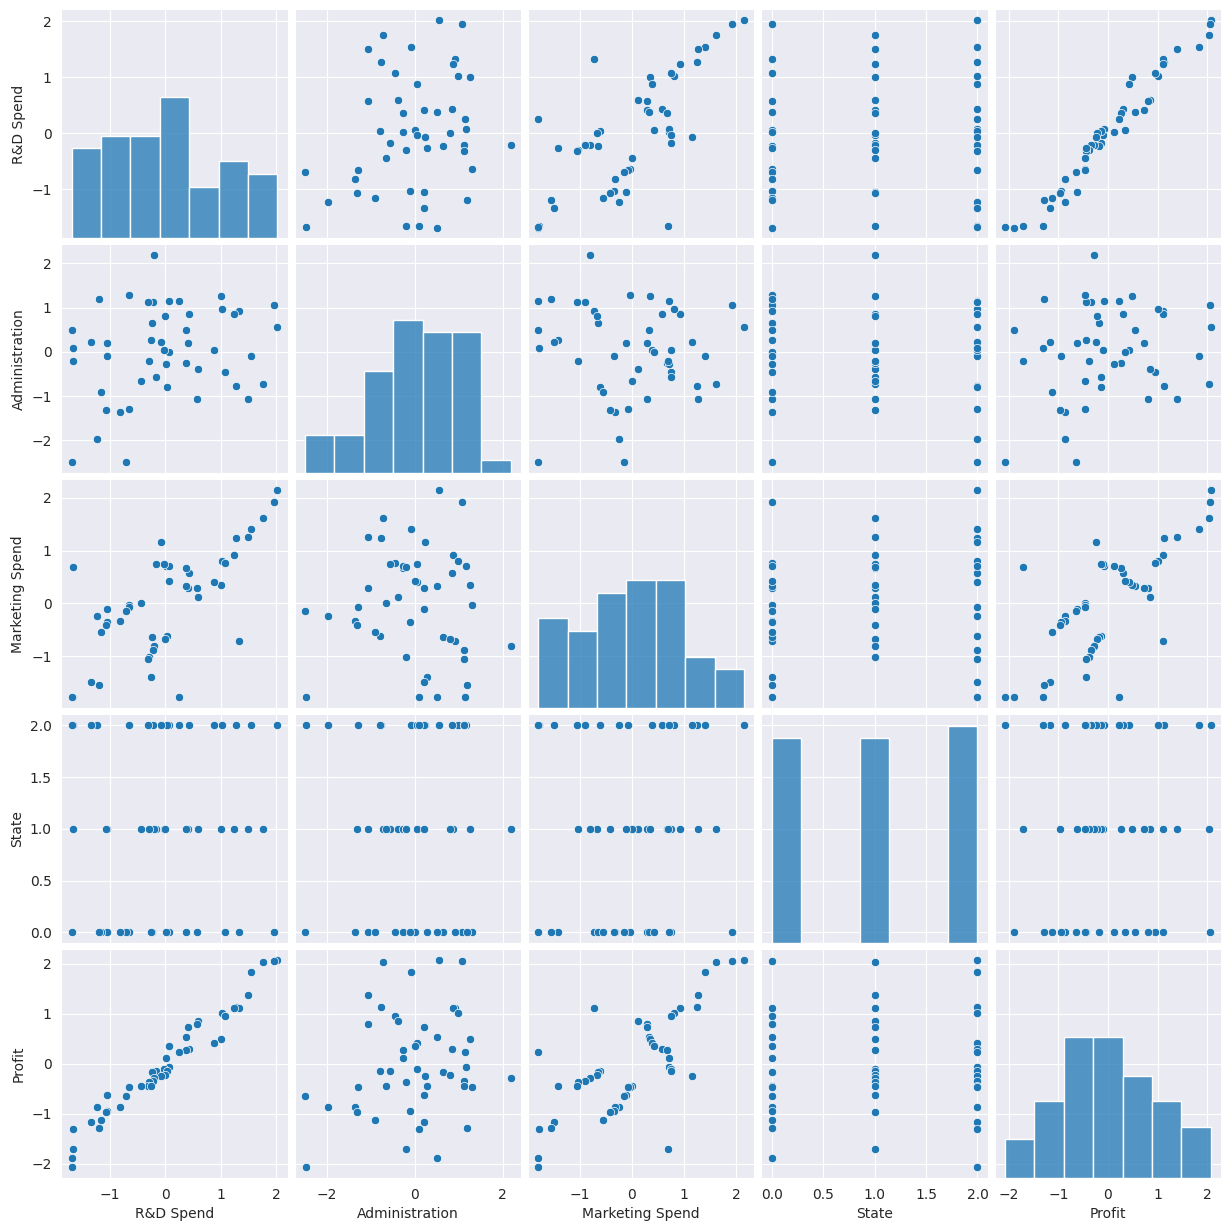

In [36]:
#format the plot background as scatter plots for all variables
import seaborn as sns
sns.set_style(style="darkgrid")
sns.pairplot(X8)

In [37]:
#model building
# Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
predictions = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 1.00


In [38]:
#Neural Networks with Keras:

from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

# Convert labels to one-hot encoding
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

# Initialize the neural network model
nn_model = Sequential()

# Add layers to the model
nn_model.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))
nn_model.add(Dense(units=3, activation='softmax'))

# Compile the model
nn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model on the training data
nn_model.fit(X_train, y_train_categorical, epochs=50, batch_size=32, validation_split=0.1)

# Evaluate the model on the test data
nn_loss, nn_accuracy = nn_model.evaluate(X_test, y_test_categorical)
print(f"Neural Network Accuracy: {nn_accuracy:.2f}")

Epoch 1/50
4/4 [==============================] - 1s 90ms/step - loss: 1.7794 - accuracy: 0.3519 - val_loss: 1.8310 - val_accuracy: 0.1667
Epoch 2/50
4/4 [==============================] - 0s 11ms/step - loss: 1.4619 - accuracy: 0.3519 - val_loss: 1.4798 - val_accuracy: 0.1667
Epoch 3/50
4/4 [==============================] - 0s 12ms/step - loss: 1.2249 - accuracy: 0.3519 - val_loss: 1.2285 - val_accuracy: 0.1667
Epoch 4/50
4/4 [==============================] - 0s 11ms/step - loss: 1.0722 - accuracy: 0.3519 - val_loss: 1.0633 - val_accuracy: 0.2500
Epoch 5/50
4/4 [==============================] - 0s 12ms/step - loss: 0.9884 - accuracy: 0.5093 - val_loss: 0.9666 - val_accuracy: 0.8333
Epoch 6/50
4/4 [==============================] - 0s 11ms/step - loss: 0.9497 - accuracy: 0.8056 - val_loss: 0.9115 - val_accuracy: 1.0000
Epoch 7/50
4/4 [==============================] - 0s 13ms/step - loss: 0.9300 - accuracy: 0.7870 - val_loss: 0.8800 - val_accuracy: 0.9167
Epoch 8/50
4/4 [===========

In [39]:
#Gradient Boosting:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the Gradient Boosting Classifier model
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the model on the training data
gb_model.fit(X_train, y_train)

# Make predictions on the test data
gb_predictions = gb_model.predict(X_test)

# Calculate the accuracy of the Gradient Boosting model
gb_accuracy = accuracy_score(y_test, gb_predictions)
print(f"Gradient Boosting Accuracy: {gb_accuracy:.2f}")

Gradient Boosting Accuracy: 1.00


In [40]:
#Support Vector Machines (SVM):

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Initialize the SVM model
svm_model = SVC(kernel='linear', C=1.0, random_state=42)

# Train the model on the training data
svm_model.fit(X_train, y_train)

# Make predictions on the test data
svm_predictions = svm_model.predict(X_test)

# Calculate the accuracy of the SVM model
svm_accuracy = accuracy_score(y_test, svm_predictions)
print(f"SVM Accuracy: {svm_accuracy:.2f}")


SVM Accuracy: 1.00


In [41]:
import statsmodels.api as sm

# Assuming y is your endogenous variable and X is your exogenous variable
# y and X are assumed to be NumPy arrays or pandas DataFrame/Series objects

# Add a constant to the exogenous variables (this is necessary for statsmodels)
X = sm.add_constant(X)

# Create a model with endogenous and exogenous variables
model = sm.OLS(y, X)  # OLS stands for Ordinary Least Squares, a method for estimating the parameters of a linear regression model

# Fit the model
results = model.fit()

# Print the summary of the regression results
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     484.5
Date:                Sat, 28 Oct 2023   Prob (F-statistic):           8.46e-83
Time:                        04:55:30   Log-Likelihood:                 17.437
No. Observations:                 150   AIC:                            -24.87
Df Residuals:                     145   BIC:                            -9.821
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1865      0.205      0.910      0.3

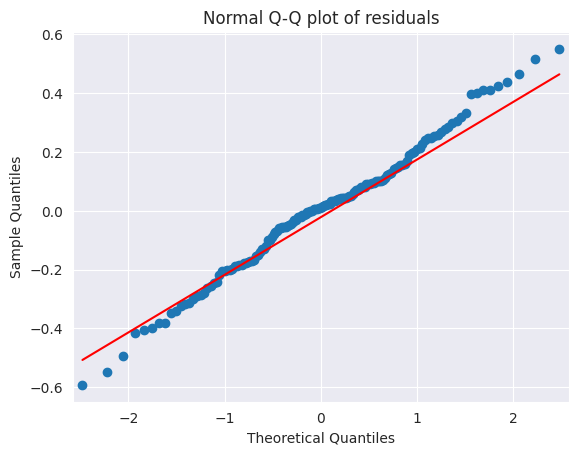

[array([], dtype=int64)]

In [42]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Assuming X and y are your independent and dependent variables
model = sm.OLS(y, sm.add_constant(X))  # Add constant if needed, sm.add_constant(X) for example
results = model.fit()

# Now you can access the residuals and create the Q-Q plot
residuals = results.resid

QQ_plot = sm.qqplot(residuals, line="q")
plt.title("Normal Q-Q plot of residuals")
plt.show()

import numpy as np
list(np.where((results.resid) > 10))

In [43]:
import pandas as pd
import statsmodels.formula.api as smf
# Create an empty list to store R-squared values
rsquared_values = []

In [44]:
# Define the models and calculate R-squared for each
models = [
    'Profit~R&D Spend',
    'Profit~R&D Spend+Administration',
    'Profit~R&D Spend+Administration+State',
    'Profit~R&D Spend+Administration+State+Marketing Spend',
]

In [45]:
# Create a DataFrame to display the R-squared values
import pandas as pd
from sklearn.metrics import r2_score

# Sample R-squared values for different models/scenarios
models = ['Model 1', 'Model 2', 'Model 3']
r_squared_values = [0.75, 0.82, 0.91]  # Replace these values with your calculated R-squared values

# Create a dictionary with data
data = {'Model': models, 'R-squared': r_squared_values}

# Create a DataFrame
r_squared_df = pd.DataFrame(data)

# Display the DataFrame
print(r_squared_df)

     Model  R-squared
0  Model 1       0.75
1  Model 2       0.82
2  Model 3       0.91
